#first I am importing all the packages necesarry for this analysis. 

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.offsetbox import AnchoredText
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib.offsetbox import AnchoredText

In [2]:
# Read in the ESI data
esi_path = 'C:/Users/cwalker/Desktop/SCANAnalysis/data/ESI_1wk_tif2select_pt.csv'
esi = pd.read_csv(esi_path)
esi['Date'] = pd.to_datetime(esi['Date'])
esi

,Date,ESI,station
0,2001-01-01,0.212788,2057:AL:SCAN
1,2001-01-01,0.565784,2078:AL:SCAN
2,2001-01-01,2.316189,2177:AL:SCAN
3,2001-01-01,-9999.000000,2113:AL:SCAN
4,2001-01-01,0.120552,2174:AL:SCAN
...,...,...,...
19075,2020-12-30,-1.124450,2056:AL:SCAN
19076,2020-12-30,-0.528438,2179:AL:SCAN
19077,2020-12-30,0.047133,2115:AL:SCAN
19078,2020-12-30,0.207961,2175:AL:SCAN


In [3]:
# Read in the SCAN data
scan_path = 'C:/Users/cwalker/Desktop/SCANAnalysis/data/SCAN_DEPTHS_ALL.csv'
scan = pd.read_csv(scan_path)

# Just get the columns we are interested in and convert dates to datetime
sms = scan[['Date', 'station','SMS-2.0in', 'SMS-4.0in', 'SMS-8.0in', 'SMS-20.0in','SMS-40.0in']].copy()
sms['Date'] = pd.to_datetime(sms['Date'])

In [4]:
sms

,Date,station,SMS-2.0in,SMS-4.0in,SMS-8.0in,SMS-20.0in,SMS-40.0in
0,2002-04-24,2057:AL:SCAN,14.7,12.7,16.6,33.8,35.1
1,2002-04-25,2057:AL:SCAN,14.5,11.8,16.0,NaN,34.9
2,2002-04-26,2057:AL:SCAN,13.5,11.6,15.4,34.4,34.9
3,2002-04-27,2057:AL:SCAN,13.2,11.5,15.5,33.8,34.9
4,2002-04-28,2057:AL:SCAN,13.5,11.5,15.0,32.5,34.6
...,...,...,...,...,...,...,...
79218,2019-10-12,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN
79219,2020-03-28,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN
79220,2020-05-31,2182:AL:SCAN,NaN,NaN,NaN,NaN,NaN
79221,2019-09-21,2176:AL:SCAN,NaN,NaN,NaN,NaN,NaN


In [5]:
#create the rolling averages for each level of the soil moisture column. 
#The window is set for 7 days and the minimum periods required for each week is at least 3 days of data. 
sms['2in_rolling_mean'] = sms['SMS-2.0in'].rolling(7, min_periods=3).mean()
sms['4in_rolling_mean'] = sms['SMS-4.0in'].rolling(7, min_periods=3).mean()

In [6]:
sms.head(8)

,Date,station,SMS-2.0in,SMS-4.0in,SMS-8.0in,SMS-20.0in,SMS-40.0in,2in_rolling_mean,4in_rolling_mean
0,2002-04-24,2057:AL:SCAN,14.7,12.7,16.6,33.8,35.1,NaN,NaN
1,2002-04-25,2057:AL:SCAN,14.5,11.8,16.0,NaN,34.9,NaN,NaN
2,2002-04-26,2057:AL:SCAN,13.5,11.6,15.4,34.4,34.9,14.233333,12.033333
3,2002-04-27,2057:AL:SCAN,13.2,11.5,15.5,33.8,34.9,13.975000,11.900000
4,2002-04-28,2057:AL:SCAN,13.5,11.5,15.0,32.5,34.6,13.880000,11.820000
5,2002-04-29,2057:AL:SCAN,13.3,11.4,14.6,32.3,34.6,13.783333,11.750000
6,2002-04-30,2057:AL:SCAN,12.9,11.1,14.0,32.4,34.6,13.657143,11.657143
7,2002-05-01,2057:AL:SCAN,19.8,11.7,14.0,31.9,34.4,14.385714,11.514286


In [7]:
#create the averages for sliced mean data at two levels throughout the column
sms['SMS-2.0+4.0_avg'] = (sms['2in_rolling_mean'] + sms['4in_rolling_mean']) / 2

In [8]:
sms.head(8)

,Date,station,SMS-2.0in,SMS-4.0in,SMS-8.0in,SMS-20.0in,SMS-40.0in,2in_rolling_mean,4in_rolling_mean,SMS-2.0+4.0_avg
0,2002-04-24,2057:AL:SCAN,14.7,12.7,16.6,33.8,35.1,NaN,NaN,NaN
1,2002-04-25,2057:AL:SCAN,14.5,11.8,16.0,NaN,34.9,NaN,NaN,NaN
2,2002-04-26,2057:AL:SCAN,13.5,11.6,15.4,34.4,34.9,14.233333,12.033333,13.133333
3,2002-04-27,2057:AL:SCAN,13.2,11.5,15.5,33.8,34.9,13.975000,11.900000,12.937500
4,2002-04-28,2057:AL:SCAN,13.5,11.5,15.0,32.5,34.6,13.880000,11.820000,12.850000
5,2002-04-29,2057:AL:SCAN,13.3,11.4,14.6,32.3,34.6,13.783333,11.750000,12.766667
6,2002-04-30,2057:AL:SCAN,12.9,11.1,14.0,32.4,34.6,13.657143,11.657143,12.657143
7,2002-05-01,2057:AL:SCAN,19.8,11.7,14.0,31.9,34.4,14.385714,11.514286,12.950000


In [9]:
#subset sms for each single group mean by station
two_in = sms[['station', 'Date', '2in_rolling_mean']]

#subset the sms for each two layers sliced mean groups by station
two_in_four_in_avg = sms[['station', 'Date', 'SMS-2.0+4.0_avg']]

In [10]:
 #merge ESI and SMS on single groups mean
two_in_merge = pd.merge(left=esi, right=two_in, on=['Date', 'station'], how='outer')

#merge ESI and SMS on two groups mean 
two_in_four_in_merge = pd.merge(left=esi, right=two_in_four_in_avg, on=['Date', 'station'], how='outer')

In [11]:
#sample a dataframe to check for correctness
two_in_merge

,Date,ESI,station,2in_rolling_mean
0,2001-01-01,0.212788,2057:AL:SCAN,NaN
1,2001-01-01,0.565784,2078:AL:SCAN,NaN
2,2001-01-01,2.316189,2177:AL:SCAN,NaN
3,2001-01-01,-9999.000000,2113:AL:SCAN,NaN
4,2001-01-01,0.120552,2174:AL:SCAN,NaN
...,...,...,...,...
87001,2019-10-12,NaN,2182:AL:SCAN,NaN
87002,2020-03-28,NaN,2182:AL:SCAN,NaN
87003,2020-05-31,NaN,2182:AL:SCAN,NaN
87004,2019-09-21,NaN,2176:AL:SCAN,NaN


In [12]:
#correct the single mean indexes to get rid of ESI values where there is a bad reading and drop all NaNs. 
two_corrected = two_in_merge[two_in_merge['ESI'] != -9999].dropna()

#correct the double mean indexes to get rid of ESI values where there is a bad reading and drop all NaNs. 
two_in_four_in_corrected = two_in_four_in_merge[two_in_four_in_merge['ESI'] != -9999].dropna()


In [13]:
two_corrected

,Date,ESI,station,2in_rolling_mean
1079,2002-02-12,-1.326462,2053:AL:SCAN,39.320000
1097,2002-02-19,-1.577058,2053:AL:SCAN,37.214286
1115,2002-02-26,-1.734607,2053:AL:SCAN,36.914286
1133,2002-03-05,-0.751564,2053:AL:SCAN,36.000000
1151,2002-03-12,-2.120664,2053:AL:SCAN,35.957143
...,...,...,...,...
19073,2020-12-30,-1.000000,2182:AL:SCAN,9.271429
19074,2020-12-30,-0.842394,2176:AL:SCAN,8.914286
19075,2020-12-30,-1.124450,2056:AL:SCAN,42.171429
19076,2020-12-30,-0.528438,2179:AL:SCAN,33.114286


In [14]:
#lets grab only station 2053 for the 2in data
station_2053 = two_corrected[two_corrected['station'] == '2053:AL:SCAN']
station_2053.set_index('Date', inplace=True)

#I will subset the data for 10 years just to make the graph easier to read
years_2002_2010 = station_2053[(station_2053.index.year >= 2002) & (station_2053.index.year<= 2010)]
years_2002_2010

,ESI,station,2in_rolling_mean
Date,,,
2002-02-12,-1.326462,2053:AL:SCAN,39.320000
2002-02-19,-1.577058,2053:AL:SCAN,37.214286
2002-02-26,-1.734607,2053:AL:SCAN,36.914286
2002-03-05,-0.751564,2053:AL:SCAN,36.000000
2002-03-12,-2.120664,2053:AL:SCAN,35.957143
...,...,...,...
2010-11-26,-0.137115,2053:AL:SCAN,28.628571
2010-12-03,0.477751,2053:AL:SCAN,34.157143
2010-12-10,0.708929,2053:AL:SCAN,32.114286


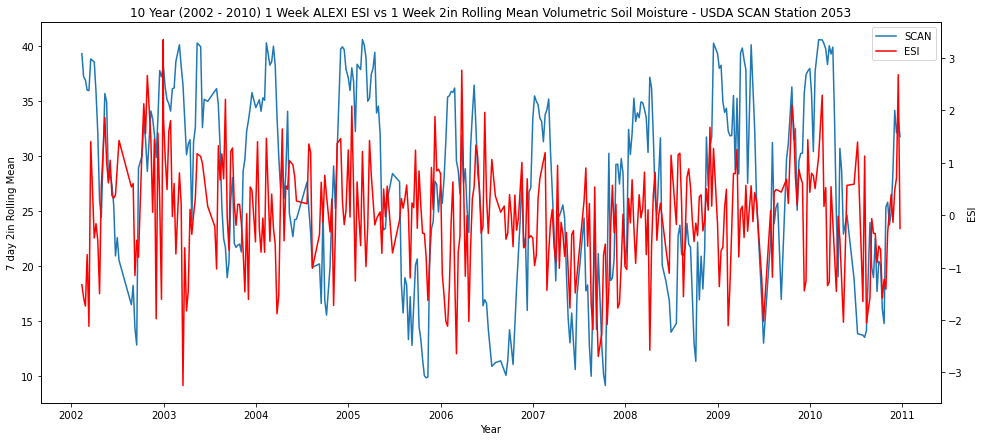

In [15]:
#create a timeseries plot
fig, ax = plt.subplots(figsize=(20,7))
fig.subplots_adjust(right=0.75)

#create the twinx plot
ESI_twin_ax = ax.twinx()

SMS, = ax.plot(years_2002_2010['2in_rolling_mean'], label='SCAN')
ESI, = ESI_twin_ax.plot(years_2002_2010['ESI'], color='red', label='ESI')

ax.set_xlabel('Year')
ax.set_ylabel('7 day 2in Rolling Mean')
ax.set_title('10 Year (2002 - 2010) 1 Week ALEXI ESI vs 1 Week 2in Rolling Mean Volumetric Soil Moisture - USDA SCAN Station 2053')
ESI_twin_ax.set_ylabel('ESI')
ax.legend(handles=[SMS, ESI])

Text(0.5, 1.0, '2053 2in Mean SMS vs ESI')

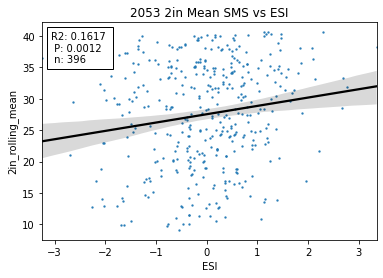

In [16]:
#lets make a linear regression plot
fig2, ax2 = plt.subplots()
sns.regplot(ax=ax2, x=years_2002_2010['ESI'], y=years_2002_2010['2in_rolling_mean'], data='years_2002_2010', scatter_kws={'s':2}, line_kws={'color': 'black'})
stats_two = stats.pearsonr(years_2002_2010['ESI'], years_2002_2010['2in_rolling_mean'])
formated_r_two = ("{:.4f}".format(stats_two[0]))
formated_p_two = ("{:.4f}".format(stats_two[1]))
shape_two = years_2002_2010.shape[0]
at_two = AnchoredText(s=f"R2: {formated_r_two} \n P: {formated_p_two} \n n: {shape_two}", loc='upper left')
ax2.add_artist(at_two)
ax2.set_title('2053 2in Mean SMS vs ESI')

In [17]:
#lets look at 2in_4in data
two_in_four_in_corrected.set_index('Date', inplace=True)
two_in_four_in_corrected

#lets make the dataset 

,ESI,station,SMS-2.0+4.0_avg
Date,,,
2002-02-12,-1.326462,2053:AL:SCAN,35.110000
2002-02-19,-1.577058,2053:AL:SCAN,35.535714
2002-02-26,-1.734607,2053:AL:SCAN,35.385714
2002-03-05,-0.751564,2053:AL:SCAN,34.657143
2002-03-12,-2.120664,2053:AL:SCAN,34.692857
...,...,...,...
2020-12-30,-1.414077,2181:AL:SCAN,31.685714
2020-12-30,-1.000000,2182:AL:SCAN,14.114286
2020-12-30,-0.842394,2176:AL:SCAN,10.528571


In [18]:
#lets look at 2053 on a smaller scale at 1 year. 
station_2053_2in_4in = two_in_four_in_corrected[two_in_four_in_corrected['station'] == '2053:AL:SCAN'] 
year_2002_2010_2in_4in = station_2053_2in_4in[(station_2053_2in_4in.index.year >= 2002) & (station_2053_2in_4in.index.year <= 2010)]
year_2002_2010_2in_4in

,ESI,station,SMS-2.0+4.0_avg
Date,,,
2002-02-12,-1.326462,2053:AL:SCAN,35.110000
2002-02-19,-1.577058,2053:AL:SCAN,35.535714
2002-02-26,-1.734607,2053:AL:SCAN,35.385714
2002-03-05,-0.751564,2053:AL:SCAN,34.657143
2002-03-12,-2.120664,2053:AL:SCAN,34.692857
...,...,...,...
2010-11-26,-0.137115,2053:AL:SCAN,31.464286
2010-12-03,0.477751,2053:AL:SCAN,35.257143
2010-12-10,0.708929,2053:AL:SCAN,33.685714


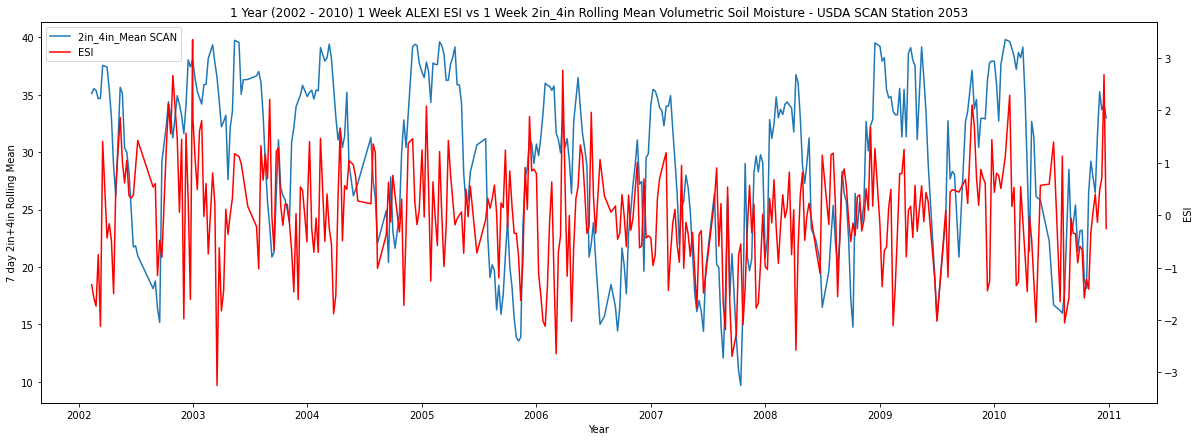

In [19]:
#create a timeseries plot
fig3, ax3 = plt.subplots(figsize=(20,7))
fig2.subplots_adjust(right=0.75)

#create the twinx plot
ESI_twin_ax2 = ax3.twinx()

SMS2in_4in, = ax3.plot(year_2002_2010_2in_4in['SMS-2.0+4.0_avg'], label='2in_4in_Mean SCAN')
ESI2, = ESI_twin_ax2.plot(year_2002_2010_2in_4in['ESI'], color='red', label='ESI')

ax3.set_xlabel('Year')
ax3.set_ylabel('7 day 2in+4in Rolling Mean')
ax3.set_title('1 Year (2002 - 2010) 1 Week ALEXI ESI vs 1 Week 2in_4in Rolling Mean Volumetric Soil Moisture - USDA SCAN Station 2053')
ESI_twin_ax2.set_ylabel('ESI')
ax3.legend(handles=[SMS2in_4in, ESI2])

Text(0.5, 1.0, '2053 2in_4in Mean SMS vs ESI')

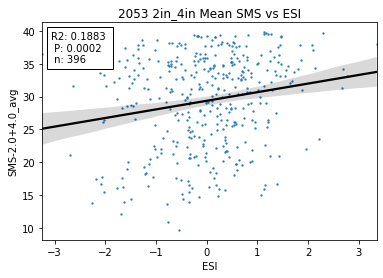

In [20]:
#lets make a linear regression plot
fig4, ax4 = plt.subplots()
sns.regplot(ax=ax4, x=year_2002_2010_2in_4in['ESI'], y=year_2002_2010_2in_4in['SMS-2.0+4.0_avg'], data='year_2002_2010_2in_4in', scatter_kws={'s':2}, line_kws={'color': 'black'})
stats_two_four = stats.pearsonr(year_2002_2010_2in_4in['ESI'], year_2002_2010_2in_4in['SMS-2.0+4.0_avg'])
formated_r_two_four = ("{:.4f}".format(stats_two_four[0]))
formated_p_two_four = ("{:.4f}".format(stats_two_four[1]))
shape_two_four = year_2002_2010_2in_4in.shape[0]
at_two_four = AnchoredText(s=f"R2: {formated_r_two_four} \n P: {formated_p_two_four} \n n: {shape_two_four}", loc='upper left')
ax4.add_artist(at_two_four)
ax4.set_title('2053 2in_4in Mean SMS vs ESI')